# Exploratory Data Analysis for Hipparcos Star Catalog

Hipparcos Stellar Catalog from Kaggle https://www.kaggle.com/konivat/hipparcos-star-catalog

In [1]:
# Load packages and set the seaborn style
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_style('whitegrid') 

In [2]:
# Load Hipparcos dataset
df = pd.read_csv("hipparcos-voidmain.csv")
df.head()

,Catalog,HIP,Proxy,RAhms,DEdms,Vmag,VarFlag,r_Vmag,RAdeg,DEdeg,...,Survey,Chart,Notes,HD,BD,CoD,CPD,(V-I)red,SpType,r_SpType
0,H,1,NaN,00 00 00.22,+01 05 20.4,9.10,NaN,H,0.000912,1.089013,...,S,NaN,NaN,224700.0,B+00 5077,NaN,NaN,0.66,F5,S
1,H,2,NaN,00 00 00.91,-19 29 55.8,9.27,NaN,G,0.003797,-19.498837,...,NaN,NaN,NaN,224690.0,B-20 6688,NaN,NaN,1.04,K3V,4
2,H,3,NaN,00 00 01.20,+38 51 33.4,6.61,NaN,G,0.005008,38.859286,...,S,NaN,NaN,224699.0,B+38 5108,NaN,NaN,0.00,B9,S
3,H,4,NaN,00 00 02.01,-51 53 36.8,8.06,NaN,H,0.008382,-51.893546,...,S,NaN,NaN,224707.0,NaN,NaN,P-52 12237,0.43,F0V,2
4,H,5,NaN,00 00 02.39,-40 35 28.4,8.55,NaN,H,0.009965,-40.591224,...,NaN,NaN,NaN,224705.0,NaN,C-41 15372,P-41 9991,0.95,G8III,2


In [3]:
# General info about features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118218 entries, 0 to 118217
Data columns (total 78 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Catalog    118218 non-null  object 
 1   HIP        118218 non-null  int64  
 2   Proxy      10925 non-null   object 
 3   RAhms      118218 non-null  object 
 4   DEdms      118218 non-null  object 
 5   Vmag       118217 non-null  float64
 6   VarFlag    11562 non-null   float64
 7   r_Vmag     118217 non-null  object 
 8   RAdeg      117955 non-null  float64
 9   DEdeg      117955 non-null  float64
 10  AstroRef   13734 non-null   object 
 11  Plx        117955 non-null  float64
 12  pmRA       117955 non-null  float64
 13  pmDE       117955 non-null  float64
 14  e_RAdeg    117955 non-null  float64
 15  e_DEdeg    117955 non-null  float64
 16  e_Plx      117955 non-null  float64
 17  e_pmRA     117955 non-null  float64
 18  e_pmDE     117955 non-null  float64
 19  DE:RA      117955 non-n

In [4]:
# See a categorical variable, r_Vmag, the source of magnitude
df.r_Vmag.unique()

array(['H', 'G', 'T', nan], dtype=object)

In [5]:
# Count each category
df.r_Vmag.value_counts()

H    94669
G    23139
T      409
Name: r_Vmag, dtype: int64

In [6]:
# Take a subsample of the dataset with some features
df = df[["Plx","Vmag","r_Vmag","BTmag","VTmag","B-V","V-I","Hpmag","SpType","Period","HvarType","VarFlag"]]

In [7]:
# Number of null values
df.isnull( ).sum( )

Plx            263
Vmag             1
r_Vmag           1
BTmag         3398
VTmag         3339
B-V           1281
V-I           1275
Hpmag           14
SpType        3034
Period      115677
HvarType     46596
VarFlag     106656
dtype: int64

In [8]:
# Memory usage
df.memory_usage( )

Index          128
Plx         945744
Vmag        945744
r_Vmag      945744
BTmag       945744
VTmag       945744
B-V         945744
V-I         945744
Hpmag       945744
SpType      945744
Period      945744
HvarType    945744
VarFlag     945744
dtype: int64

In [9]:
# Entries with the 10 largest Vmag
df.nlargest(10, "Vmag")

,Plx,Vmag,r_Vmag,BTmag,VTmag,B-V,V-I,Hpmag,SpType,Period,HvarType,VarFlag
70015,-20.09,14.08,H,NaN,NaN,NaN,NaN,14.1687,NaN,NaN,NaN,NaN
105199,NaN,13.78,H,NaN,NaN,NaN,NaN,13.9026,G0V,NaN,NaN,NaN
36618,NaN,13.64,H,NaN,NaN,NaN,NaN,13.7712,NaN,NaN,NaN,NaN
15547,-29.58,13.63,H,NaN,NaN,0.800,0.83,13.7850,NaN,NaN,NaN,NaN
71702,-0.82,13.61,H,NaN,NaN,-0.042,-0.02,13.6036,A0,NaN,NaN,NaN
58940,9.69,13.57,H,NaN,NaN,NaN,NaN,13.7670,NaN,NaN,D,NaN
105479,NaN,13.57,H,NaN,NaN,1.044,1.10,13.7083,NaN,NaN,NaN,NaN
78463,NaN,13.55,H,NaN,NaN,1.549,2.43,13.5803,NaN,NaN,NaN,NaN
109834,-9.99,13.52,H,NaN,NaN,1.410,1.76,13.6154,M2,NaN,NaN,NaN
102370,-2.20,13.51,H,NaN,NaN,NaN,NaN,13.6650,NaN,NaN,D,NaN


<AxesSubplot:>

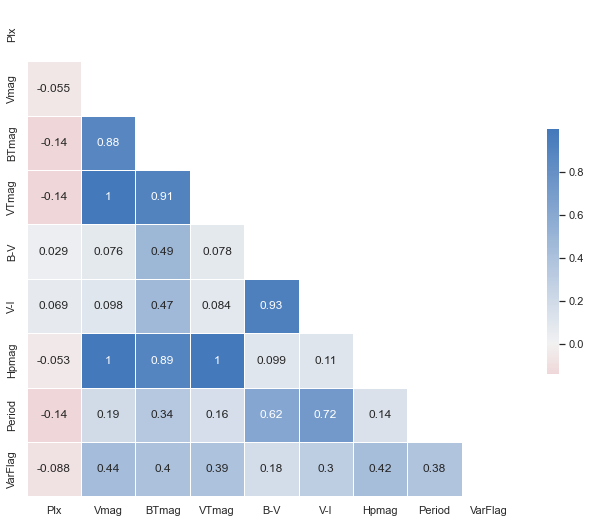

In [10]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(230, 20, as_cmap=True)
cmap = sns.diverging_palette(10, 250, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

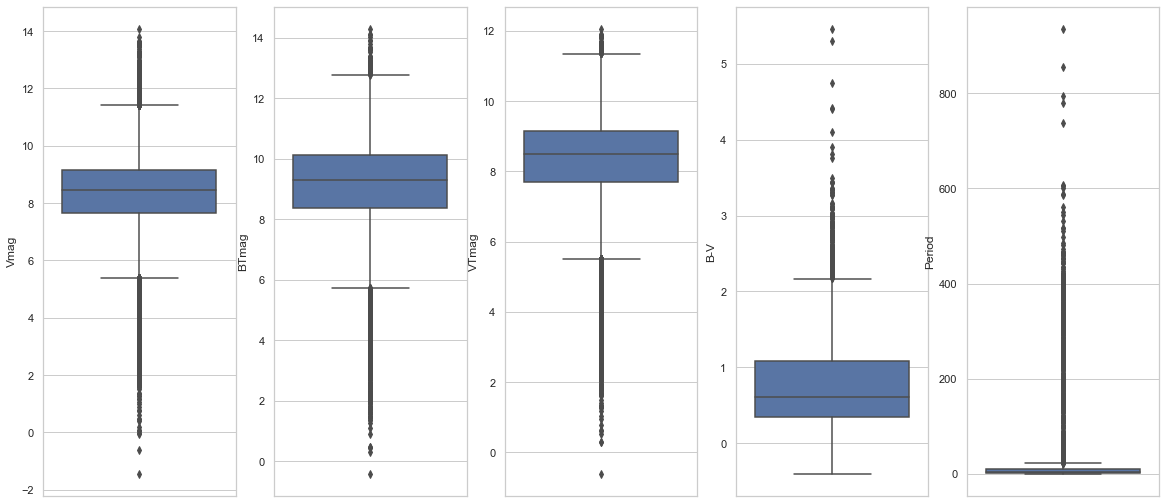

In [11]:
# Boxplot (or whiskers plot) for some numeric features
newdf = df[["Vmag","BTmag","VTmag","B-V","Period"]]
keys = len(newdf.keys())
f, axs = plt.subplots(1,keys, figsize=(20, 9))
for i, key in enumerate(newdf.keys()):
    sns.boxplot(y=newdf[key], ax=axs[i])

<AxesSubplot:>

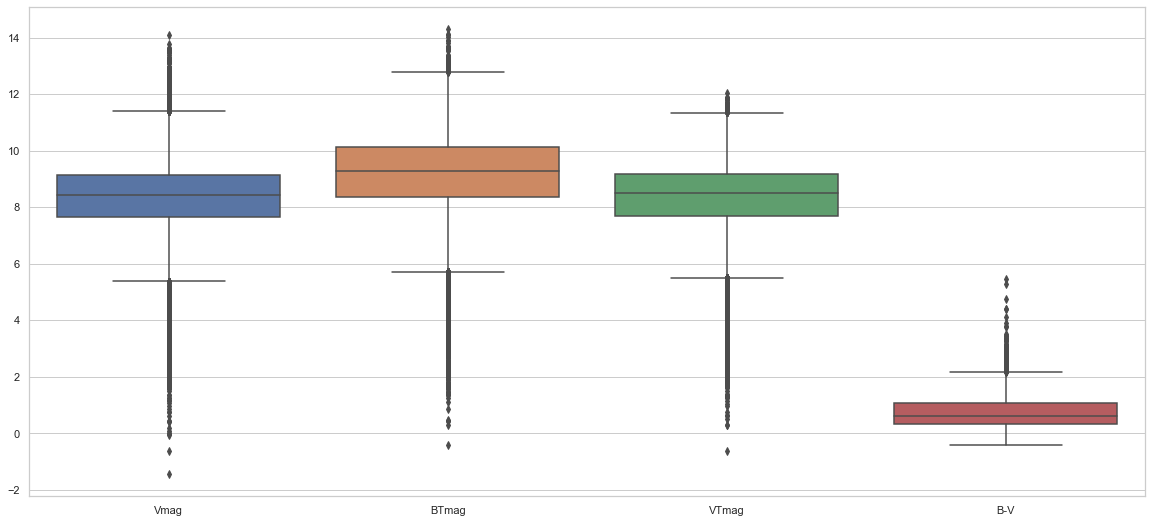

In [12]:
# Other boxplot for some magnitudes simultaneously
f, ax = plt.subplots(figsize=(20, 9))
sns.boxplot(data=df[["Vmag","BTmag","VTmag","B-V"]])

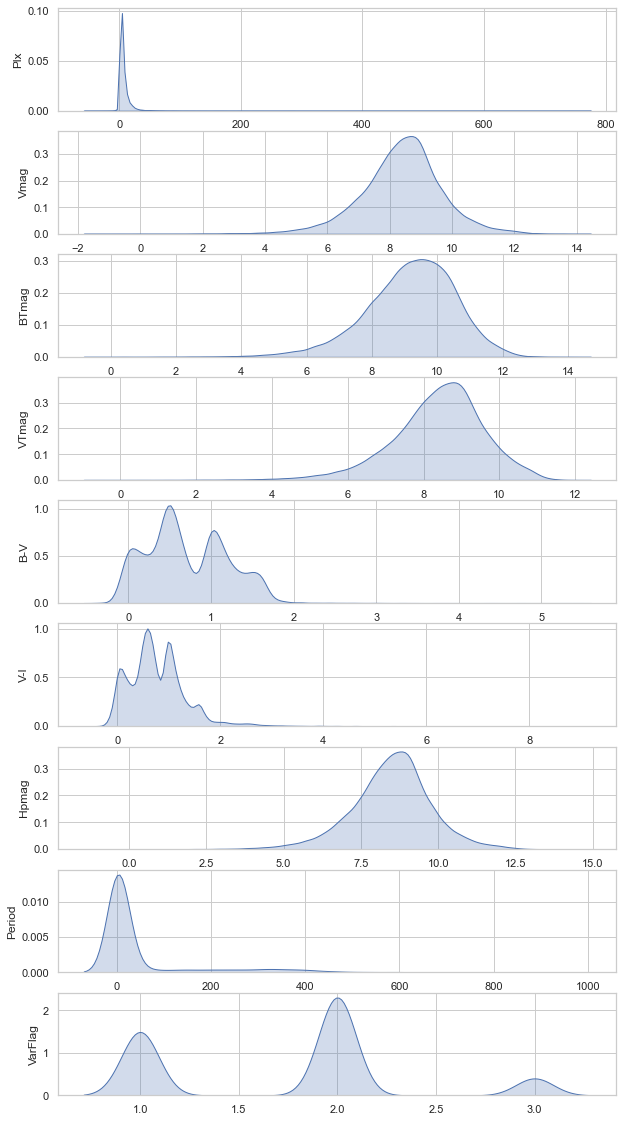

In [14]:
# KDE distribution plot
floatdf = df.select_dtypes(include=['float']).copy()
f, axs = plt.subplots(len(floatdf.keys()), 1, figsize=(10, 20))
for i, key in enumerate(floatdf.keys()):
    sns.kdeplot(data=floatdf[key], ax=axs[i], fill=True)
    axs[i].set_ylabel(key)
    axs[i].set_xlabel("")

array([[<AxesSubplot:xlabel='Vmag', ylabel='Vmag'>,
        <AxesSubplot:xlabel='BTmag', ylabel='Vmag'>,
        <AxesSubplot:xlabel='VTmag', ylabel='Vmag'>,
        <AxesSubplot:xlabel='B-V', ylabel='Vmag'>,
        <AxesSubplot:xlabel='Period', ylabel='Vmag'>],
       [<AxesSubplot:xlabel='Vmag', ylabel='BTmag'>,
        <AxesSubplot:xlabel='BTmag', ylabel='BTmag'>,
        <AxesSubplot:xlabel='VTmag', ylabel='BTmag'>,
        <AxesSubplot:xlabel='B-V', ylabel='BTmag'>,
        <AxesSubplot:xlabel='Period', ylabel='BTmag'>],
       [<AxesSubplot:xlabel='Vmag', ylabel='VTmag'>,
        <AxesSubplot:xlabel='BTmag', ylabel='VTmag'>,
        <AxesSubplot:xlabel='VTmag', ylabel='VTmag'>,
        <AxesSubplot:xlabel='B-V', ylabel='VTmag'>,
        <AxesSubplot:xlabel='Period', ylabel='VTmag'>],
       [<AxesSubplot:xlabel='Vmag', ylabel='B-V'>,
        <AxesSubplot:xlabel='BTmag', ylabel='B-V'>,
        <AxesSubplot:xlabel='VTmag', ylabel='B-V'>,
        <AxesSubplot:xlabel='B-V', ylabel='

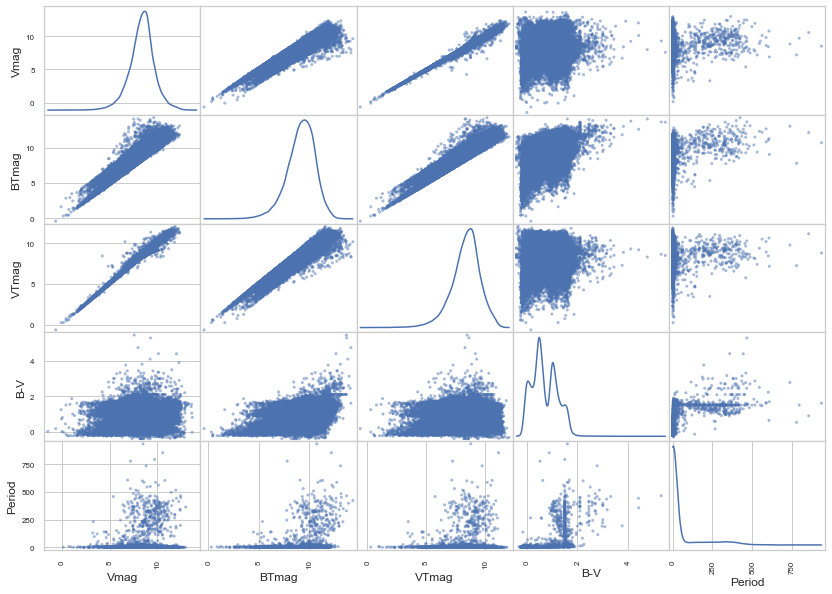

In [15]:
# Scatter plot with pandas
pd.plotting.scatter_matrix(newdf, diagonal="kde", figsize=(14,10))

## Create some joint plots

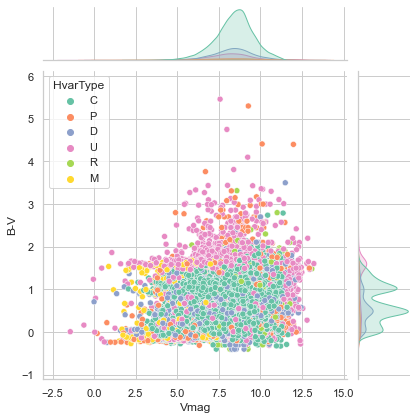

In [15]:
sns.jointplot(data=df, x="Vmag", y="B-V", hue="HvarType", palette="Set2")

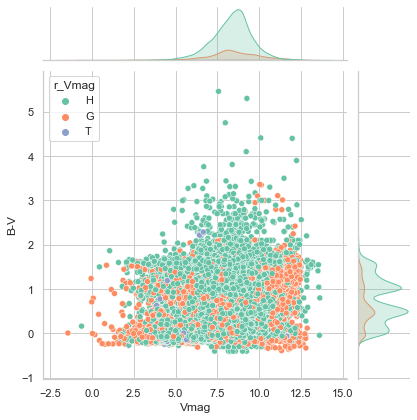

In [16]:
sns.jointplot(data=df, x="Vmag", y="B-V", hue="r_Vmag", palette="Set2", ax=axs[1])

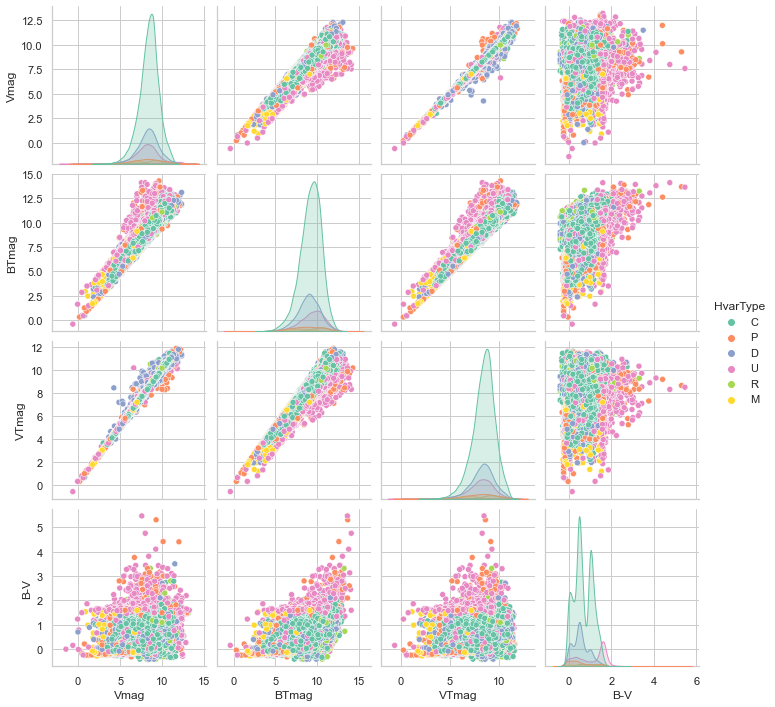

In [17]:
Hippairplot = sns.pairplot(data=df[["Vmag","BTmag","VTmag","B-V","HvarType"]], hue="HvarType", palette="Set2")

In [18]:
Hippairplot.savefig("Hippairplot.png")